Code adapted from [Visualizing elevation contours from raster digital elevation models in Python](https://www.earthdatascience.org/tutorials/visualize-digital-elevation-model-contours-matplotlib/)

In [1]:
pip install elevation

Note: you may need to restart the kernel to use updated packages.


About the --bounds option:
`--bounds <min_longitude> <min_latitude> <max_longitude> <max_latitude>`

Where:
- min_longitude: The westernmost boundary (left).
- min_latitude: The southernmost boundary (bottom).
- max_longitude: The easternmost boundary (right).
- max_latitude: The northernmost boundary (top).


Provided bounds for Rio de Janeiro's metropolitan area:

- n_bound (north boundary) = -22.649724748272934
- s_bound (south boundary) = -23.1339033365138
- e_bound (east boundary) = -43.04835145732227
- w_bound (west boundary) = -43.8906028271505

To call the command using the provided bounds, we should pass the coordinates in the correct order (min_longitude, min_latitude, max_longitude, max_latitude):

In [26]:
!eio clip -o RJ-30m-DEM.tif --bounds -43.8906028271505 -23.1339033365138 -43.04835145732227 -22.649724748272934

make: Entering directory '/home/ebezerra/.cache/elevation/SRTM1'
make: Nothing to be done for 'download'.
make: Leaving directory '/home/ebezerra/.cache/elevation/SRTM1'
make: Entering directory '/home/ebezerra/.cache/elevation/SRTM1'
make: Nothing to be done for 'all'.
make: Leaving directory '/home/ebezerra/.cache/elevation/SRTM1'
make: Entering directory '/home/ebezerra/.cache/elevation/SRTM1'
cp SRTM1.vrt SRTM1.f6ee03340caa4a90bde2f30e7b343b52.vrt
make: Leaving directory '/home/ebezerra/.cache/elevation/SRTM1'
make: Entering directory '/home/ebezerra/.cache/elevation/SRTM1'
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 -projwin -43.8906028271505 -22.649724748272934 -43.04835145732227 -23.1339033365138 SRTM1.f6ee03340caa4a90bde2f30e7b343b52.vrt /home/ebezerra/ailab/atmoseer/notebooks/RJ-30m-DEM.tif
rm -f SRTM1.f6ee03340caa4a90bde2f30e7b343b52.vrt
make: Leaving directory '/home/ebezerra/.cache/elevation/SRTM1'


In [27]:
from osgeo import gdal
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import elevation 

In [28]:
filename = "RJ-30m-DEM.tif"
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(float)
data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

Q: The code above seems to be ploting an upside down map. Can you spot what is wrong?

A: The issue you're experiencing, where the map appears upside down, is likely due to the way the image's coordinate system is handled by GDAL. In many geospatial datasets, the y-axis (latitude) is inverted, meaning the origin is at the top left, but when plotted using matplotlib, it might interpret the array data with the y-axis flipped, causing an upside-down map. You can fix this by reversing the y-axis or using origin='upper' in the plt.contour() function to match the standard coordinate system of many raster datasets (with the origin at the top-left corner). Here's the adjusted code:

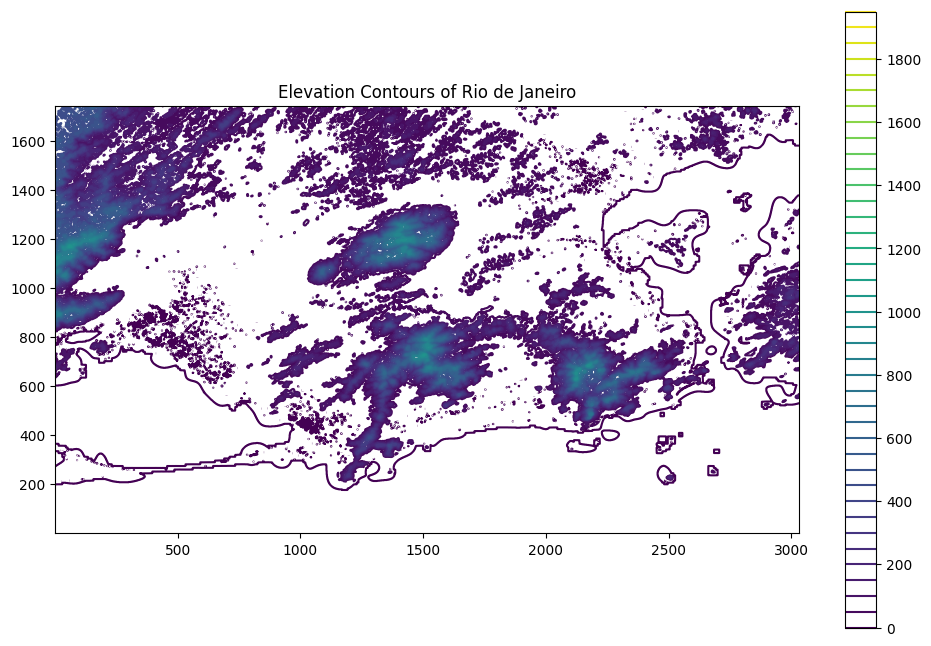

In [36]:
filename = "RJ-30m-DEM.tif"
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(float)

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

# Plot data with Matplotlib's 'contour'
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
# Reverse the y-axis by using origin='upper'
plt.contour(data_array, cmap="viridis", 
            levels=list(range(0, 2000, 50)), origin='upper')
plt.title("Elevation Contours of Rio de Janeiro")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


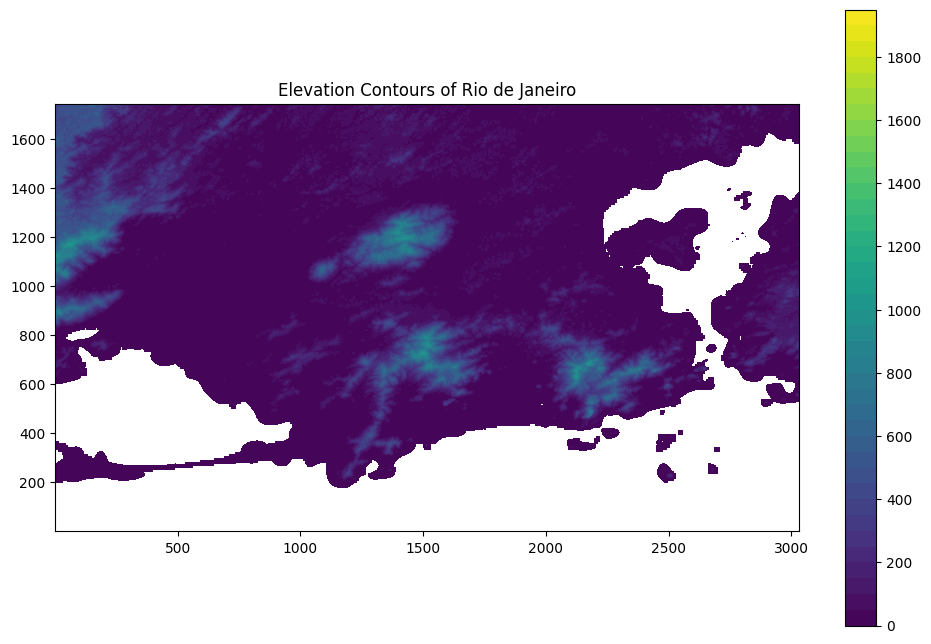

In [37]:
#Plot our data with Matplotlib's 'contourf'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contourf(data_array, cmap = "viridis", 
            levels = list(range(0, 2000, 50)), origin='upper')
plt.title("Elevation Contours of Rio de Janeiro")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()